In [3]:
DATA_PATH = "Access_to_Everyday_Life_Dataset.csv"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import MultiPoint

df = pd.read_csv(DATA_PATH)

In [8]:
df["longitude"] = df["geometry/coordinates/0"]
df["latitude"] = df["geometry/coordinates/1"]

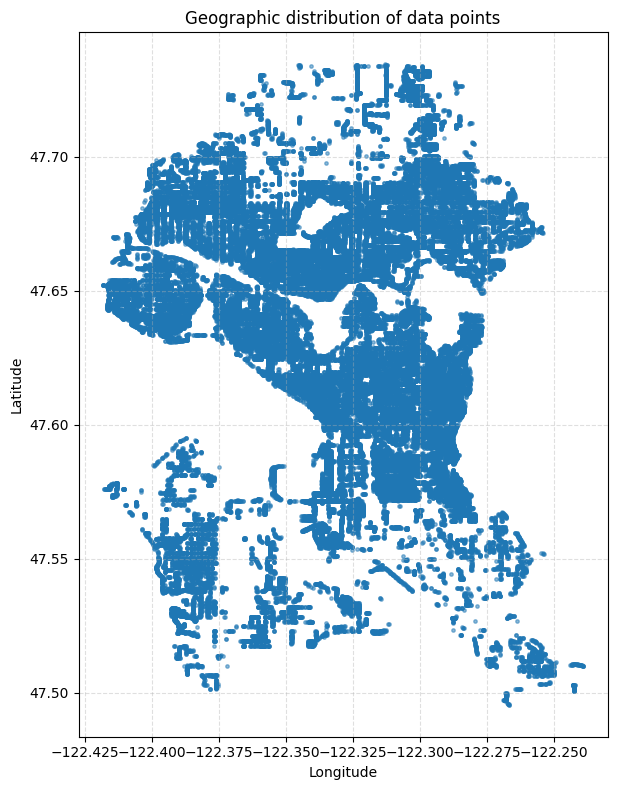

In [ ]:
# make a map of all datapoints
plt.figure(figsize=(10, 8))
plt.scatter(df["longitude"], df["latitude"], s=6, alpha=0.5)
plt.title("Geographic distribution of data points")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True, linestyle="--", alpha=0.4)
plt.gca().set_aspect("equal", adjustable="box")
plt.tight_layout()
plt.show()

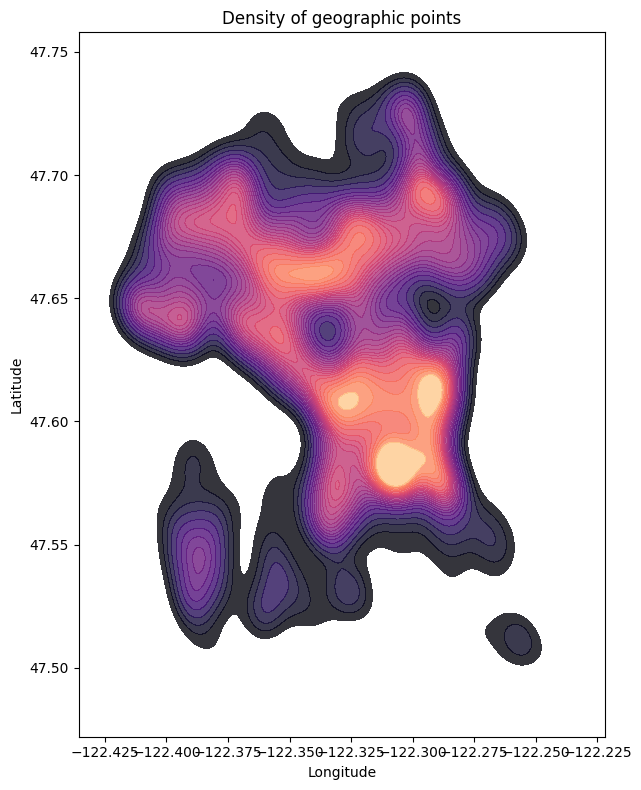

In [10]:
# visualize density using a KDE overlay
plt.figure(figsize=(10, 8))
sns.kdeplot(
    x=df["longitude"],
    y=df["latitude"],
    fill=True,
    cmap="magma",
    thresh=0.05,
    levels=25,
    alpha=0.8,
)
plt.title("Density of geographic points")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.gca().set_aspect("equal", adjustable="box")
plt.tight_layout()
plt.show()

In [16]:
# quick_hist2d: plot lon/lat density maps
def quick_hist2d(df, x, y, group_name=None, bins=100):
    plt.figure(figsize=(10, 8))
    plt.hist2d(df[x], df[y], bins=bins, cmap="magma")
    plt.colorbar(label="Count")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f"{group_name} - {x} vs {y}")
    plt.show()


CurbRamp


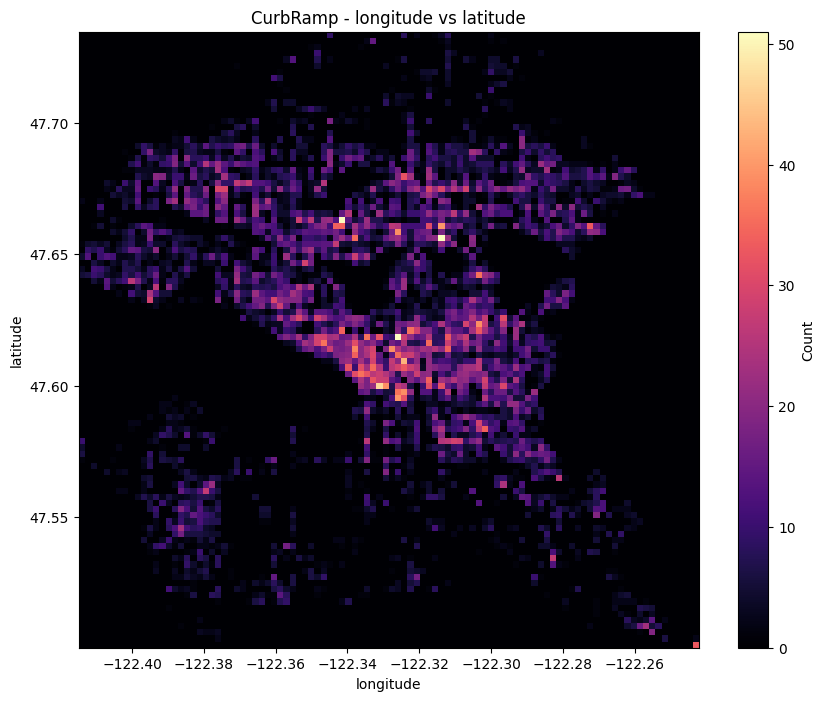

NoCurbRamp


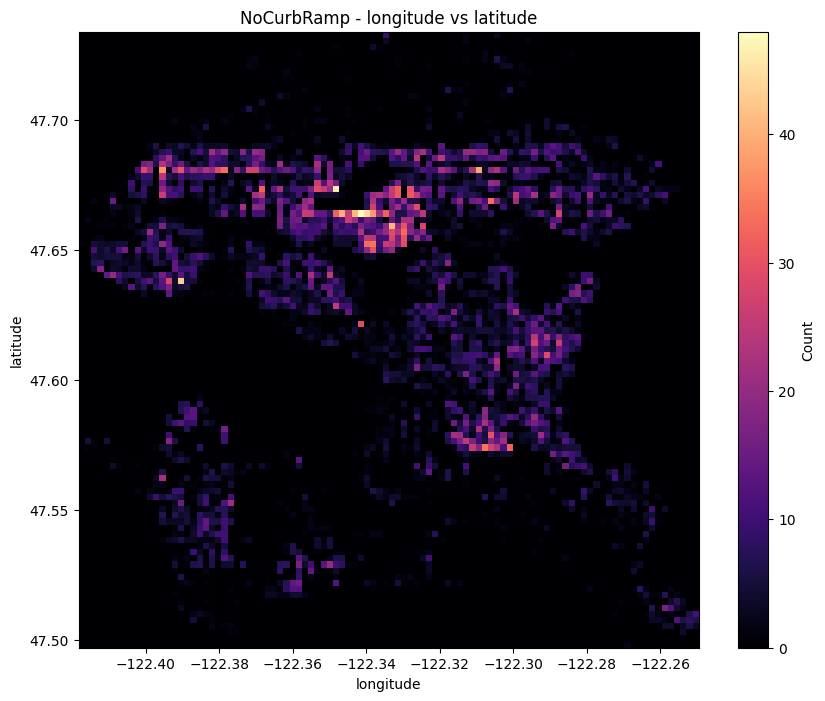

NoSidewalk


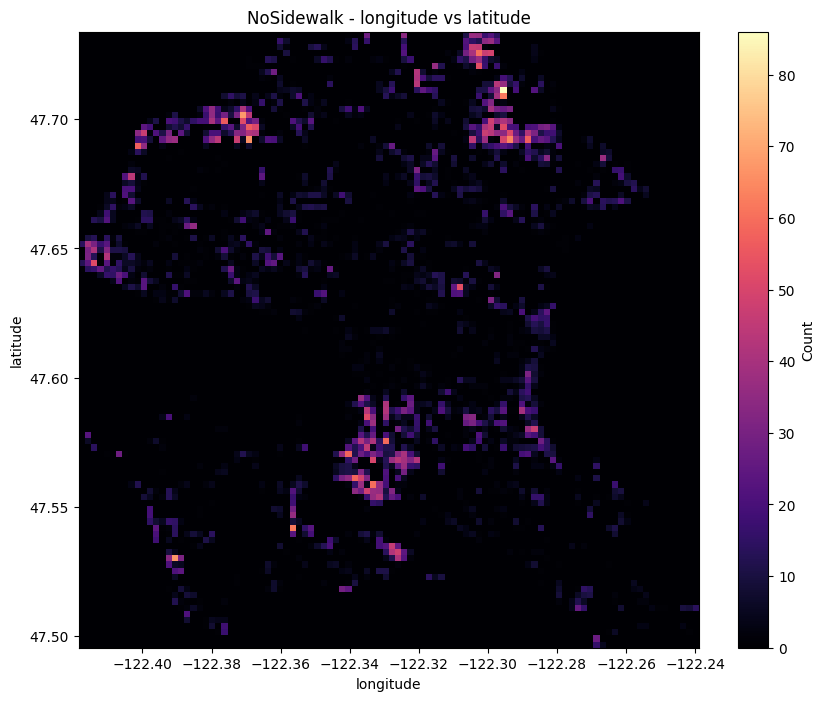

Obstacle


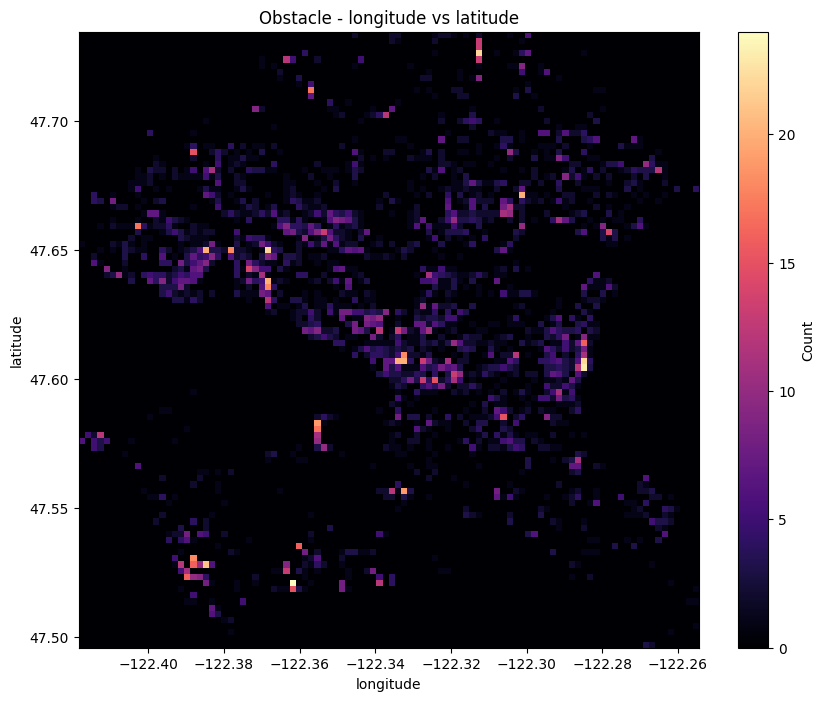

Occlusion


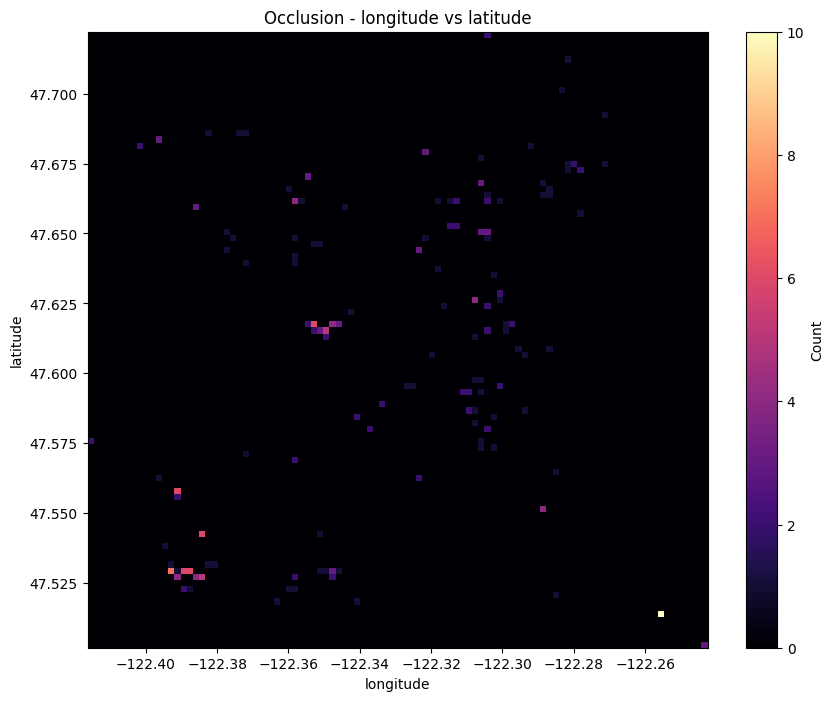

Other


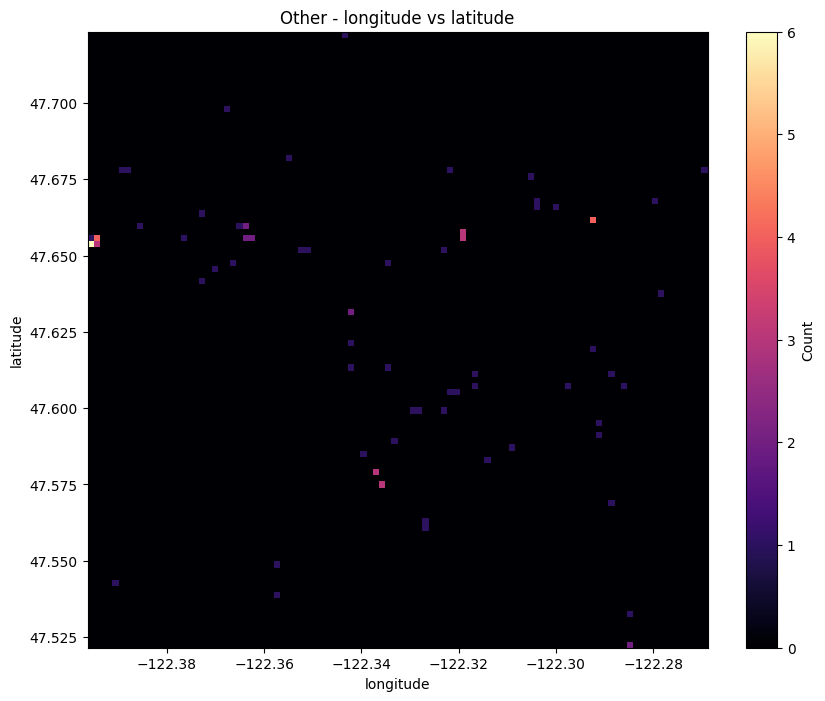

SurfaceProblem


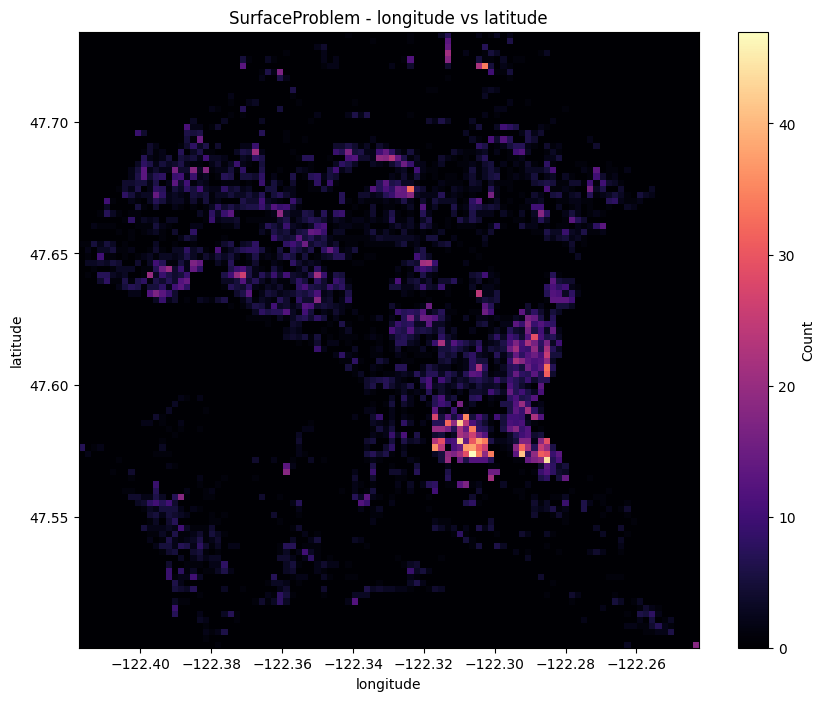

In [17]:
#split the data into groups based on properties/label_type
#then get a quick hist2d of the data

# Group the dataframe by 'properties/label_type' and plot a 2D histogram for each group
label_groups = df.groupby("properties/label_type")
for label, group in label_groups:
    print(label)
    quick_hist2d(group, "longitude", "latitude", label)


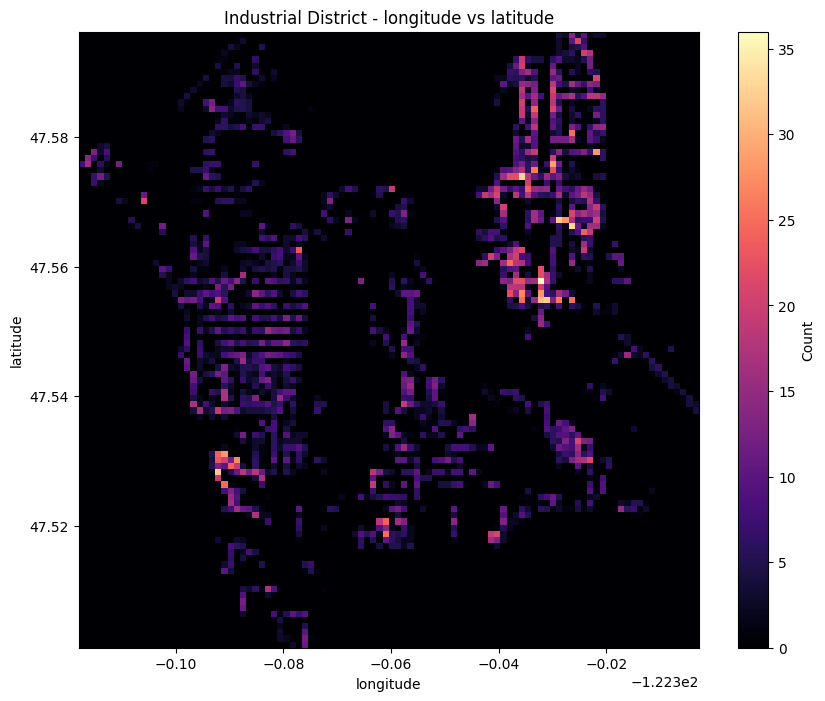

In [18]:
# map of properties/neighborhood = Industrial District
industrial_district = df[df["properties/neighborhood"] == "Industrial District"]
quick_hist2d(industrial_district, "longitude", "latitude", "Industrial District")


In [27]:
def gen_plot_by_labeltype(label_type):
    focus_mask = df["properties/label_type"] == label_type
    background = df[~focus_mask]
    foreground = df[focus_mask]

    fig, ax = plt.subplots(figsize=(10, 8))
    ax.scatter(
        background["longitude"],
        background["latitude"],
        s=4,
        color="lightsteelblue",
        alpha=0.4,
        label="background",
    )
    ax.scatter(
        foreground["longitude"],
        foreground["latitude"],
        s=6,
        color="darkred",
        alpha=0.8,
        label=label_type,
    )

    for name, chunk in df.groupby("properties/neighborhood"):
        if len(chunk) < 5:
            continue
        hull = MultiPoint(chunk[["longitude", "latitude"]].values)
        if hull.is_empty:
            continue
        hull = hull.convex_hull
        if hull.geom_type == "Polygon":
            x, y = hull.exterior.xy
            ax.fill(x, y, alpha=0.2)
        elif hull.geom_type == "LineString":
            x, y = hull.xy
            ax.plot(x, y, alpha=0.5)
        centroid = hull.centroid
        ax.text(
            centroid.x,
            centroid.y,
            name,
            fontsize=8,
            ha="center",
            va="center",
            bbox={"boxstyle": "round", "facecolor": "white", "alpha": 0.6, "edgecolor": "none", "pad": 0.3},
        )

    ax.set_aspect("equal", adjustable="box")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    plt.tight_layout()
    plt.title(label_type + " across Seattle")
    plt.show()


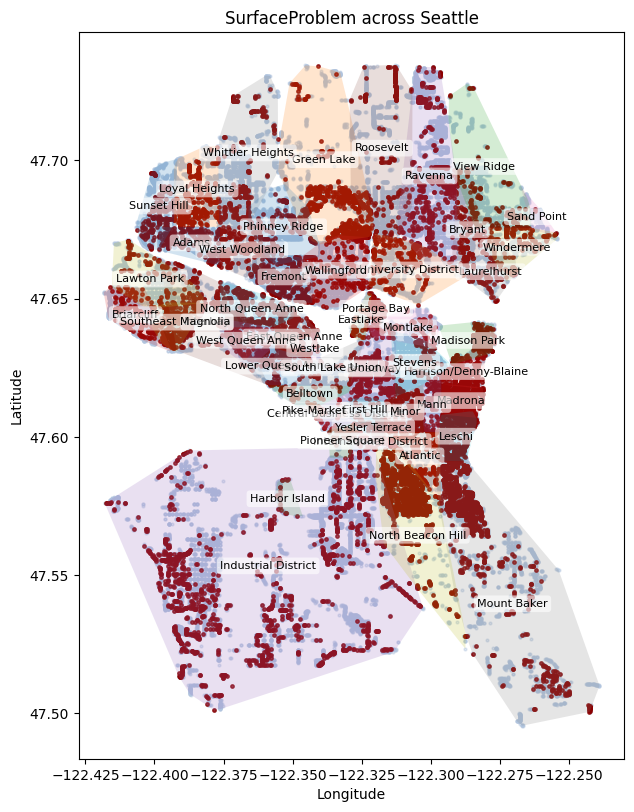

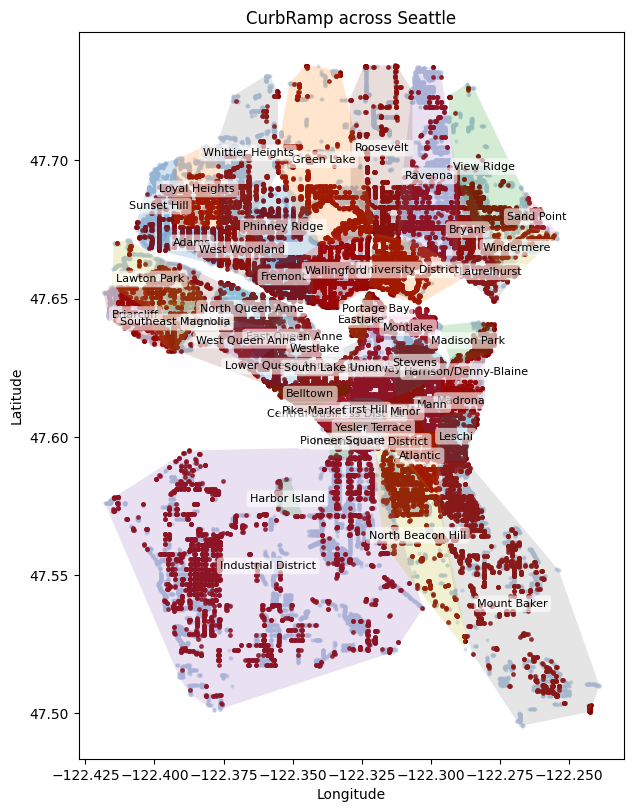

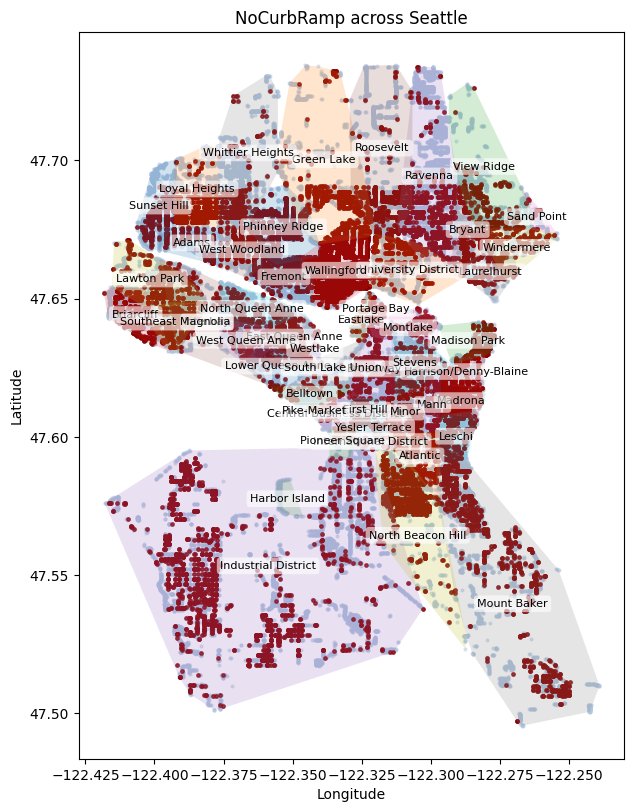

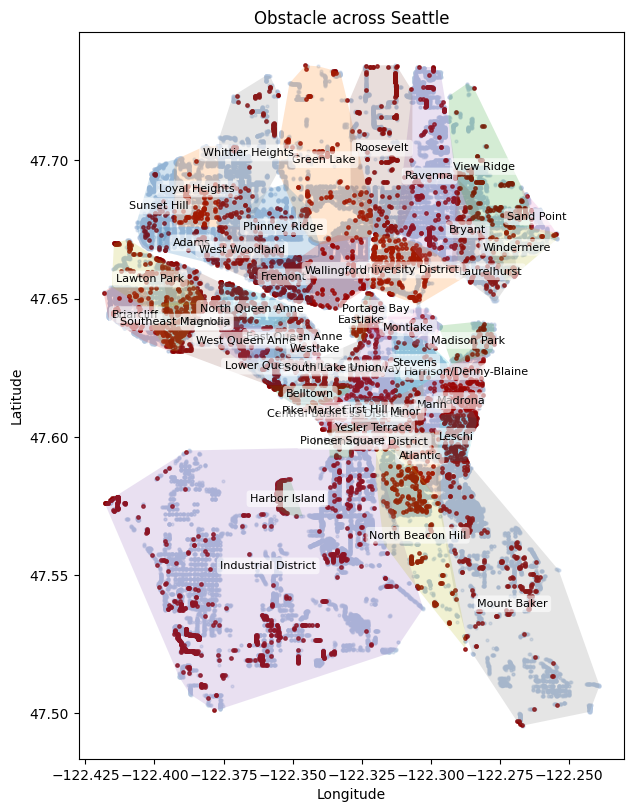

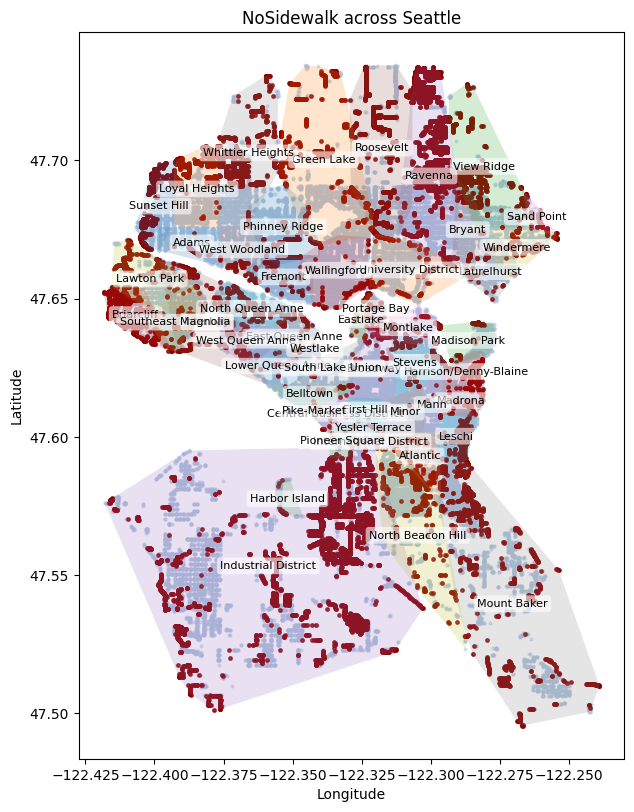

In [28]:
for label in ["SurfaceProblem", "CurbRamp", "NoCurbRamp", "Obstacle", "NoSidewalk"]:
    gen_plot_by_labeltype(label)